In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mytools.halo_new import get_mask_sector, halo_subtract
from mytools.plot import plot_heatmap, save_plot, plot_sector
from mytools.plot_custom import plot_stack_fit_res, compare_profiles
%matplotlib inline

# Halo contribution fitting

<Axes: title={'center': 'Masked stack result'}, xlabel='X', ylabel='Y'>

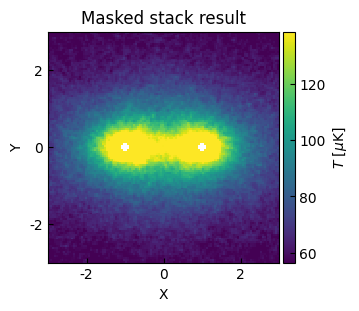

In [3]:
stack_result = np.load('tngcube_pairstack_result.npz')['data']

halo_peak_mask = get_mask_sector(rlim=[0.,0.1], thetalim=[-np.pi/2, np.pi/2])
stack_result_masked = np.ma.array(stack_result, mask=halo_peak_mask, fill_value=0)

plot_heatmap(stack_result_masked, title='Masked stack result', cmap='viridis')

<Axes: title={'center': 'Fitting mask'}, xlabel='X', ylabel='Y'>

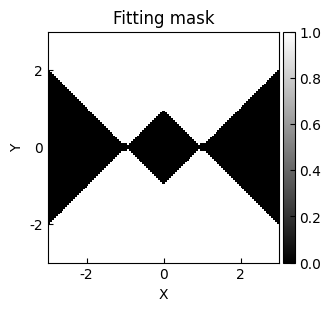

In [4]:
fit_mask = get_mask_sector(rlim=[0.1,5])
plot_heatmap(fit_mask, title='Fitting mask', cmap='gray', cbar_label='')


Goodness of fit:
Chi-squared: 453811.219
Reduced chi-squared: 31.844
RMS residual: 5.618

Plot saved to img_tngcube_stack_fit_res.png


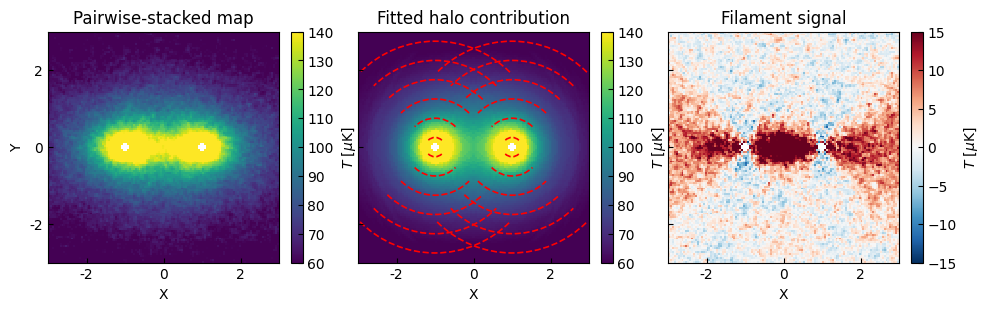

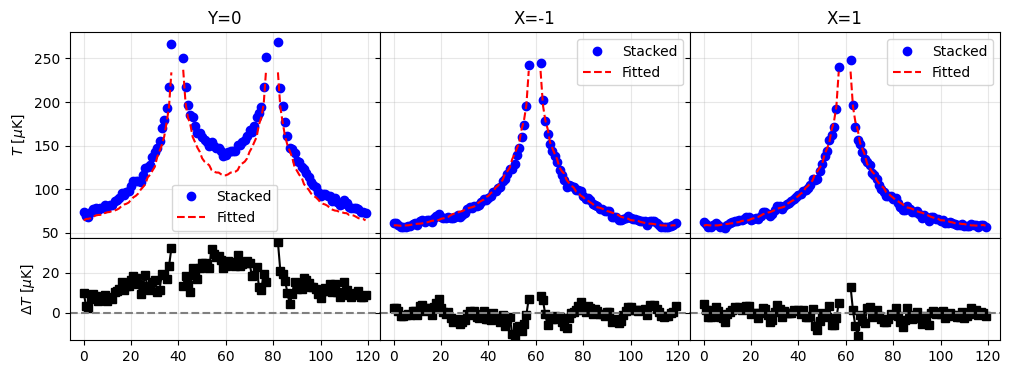

In [5]:
fitted, residual, _, = halo_subtract(
    stack_result_masked, 
    mask=fit_mask,
)

axes = plot_stack_fit_res(
    [stack_result_masked, fitted, residual],  # pyright: ignore[reportArgumentType]
    norm='linear', 
    cmap=['viridis', 'viridis', 'RdBu_r'], 
    vmax=[140,140,15], 
    vmin=[60, 60, -15]
)
plot_sector(axes[1], ec='r')
fname = 'img_tngcube_stack_fit_res.png'
save_plot(axes, fname)

compare_profiles([stack_result_masked, fitted]); # pyright: ignore[reportArgumentType]

# Estimate filament signal level

In [6]:
from mytools.estimate import get_signal_level
from mytools.plot_custom import plot_profile_2c

Parameter names:
('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1')
Gauss fit parameters: [np.float64(24.448799479162943), np.float64(0.0), np.float64(0.3119232436517183), np.float64(0.37987578425386653)]
Gauss fit covariance (without fix mean): 
[[ 1.62692582e-01 -1.16086737e-03 -9.26591977e-03]
 [-1.16086737e-03  3.81530743e-05 -2.36433347e-04]
 [-9.26591977e-03 -2.36433347e-04  1.31039894e-02]]
0 points clipped during sigma clipping.

Goodness of fit:
Chi-squared: 133.545
Reduced chi-squared: 1.141
RMS residual: 1.055

width: 0.3119232436517183
width_pix: 6


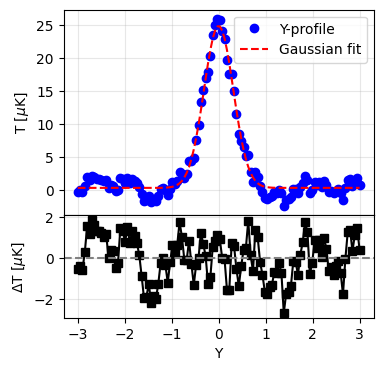

In [7]:
lx, ly, clrb, params, cov = get_signal_level(residual)

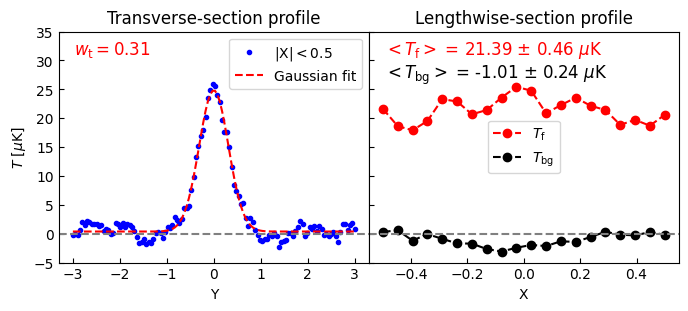

In [8]:
axes = plot_profile_2c(lx, ly, width=params[2],)
axes[0].set_ylim(-5, 35);